In [112]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel


%matplotlib inline

In [38]:
df =  pd.read_csv('data.csv')

In [39]:
df = df.drop('Unnamed: 0', 1)
df = df.fillna(value = 0)


In [40]:
print df.shape
df.head(2)

(10011, 14)


,id,rating,bitter,meaty,piquant,salty,sour,sweet,ingredientcount,numberofservings,totaltimeinseconds,course,course_num,ingredient_lem
0,Bacon-Cheddar-Pinwheels-768341,4,0.833333,0.833333,0.000000,0.833333,0.166667,0.166667,5,16.0,2100.0,Appetizer,0,"Pillsbury Refrigerated Crescent Dinner Rolls, ..."
1,Fiesta-Corn-Dip-1711704,4,0.500000,0.166667,0.833333,0.833333,0.500000,0.166667,7,4.0,900.0,Appetizer,0,"sour cream, mayonnaise, ground cumin, mexicorn..."


In [79]:
df_data = df[['rating','bitter','meaty','piquant','salty','sour','sweet','ingredientcount',
               'numberofservings','totaltimeinseconds','course_num']]
print df_data.shape
df_data.head(2)

(10011, 11)


,rating,bitter,meaty,piquant,salty,sour,sweet,ingredientcount,numberofservings,totaltimeinseconds,course_num
0,4,0.833333,0.833333,0.000000,0.833333,0.166667,0.166667,5,16.0,2100.0,0
1,4,0.500000,0.166667,0.833333,0.833333,0.500000,0.166667,7,4.0,900.0,0


In [80]:
df_data.dtypes

rating                  int64
bitter                float64
meaty                 float64
piquant               float64
salty                 float64
sour                  float64
sweet                 float64
ingredientcount         int64
numberofservings      float64
totaltimeinseconds    float64
course_num              int64
dtype: object

([], <a list of 0 Text yticklabel objects>)

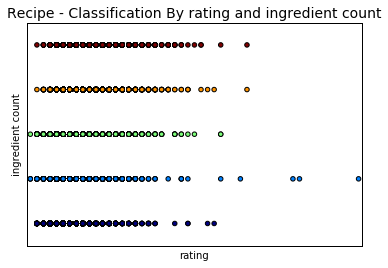

In [81]:
array = df_data.values.astype(float)
x = array[:, 7] # tot.time.sec
y = array[:, 10] # ingredient count
course = df_data.course_num
x_min, x_max = x.min() - .5, x.max() + .5
y_min, y_max = y.min() - .5, y.max() + .5

#SCATTERPLOT
plt.figure()
plt.title('Recipe - Classification By rating and ingredient count', size =14)
plt.scatter(x,y, c=course)
plt.xlabel('rating')
plt.ylabel('ingredient count')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


x = array[:, 0:10]  #X-Axis - petal length
#standardize x
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
y = array[:,10]  #Y-Axis - petal length
course = df_data.course_num     #Species
pca = PCA(n_components = 3, whiten = False)
x_fit = pca.fit(x_scaled)
x_reduced = x_fit.transform(x_scaled)

#summarize components
print("Explained Variance: %s") % pca.explained_variance_ratio_
print(pca.components_)


Explained Variance: [ 0.30207226  0.12316668  0.10740406]
[[-0.03263658 -0.50346715 -0.45401248 -0.26315827 -0.49288203 -0.34213355
  -0.32552364 -0.04873077 -0.01983464  0.03680046]
 [-0.0281368   0.03695373  0.28307383 -0.51801229  0.02376706 -0.32155413
   0.34053888 -0.59533912  0.27202344 -0.03195519]
 [-0.55826132 -0.06282817  0.00184354 -0.03002878 -0.04473221  0.03975372
   0.20439558  0.29038308  0.39623171  0.62992937]]


[]

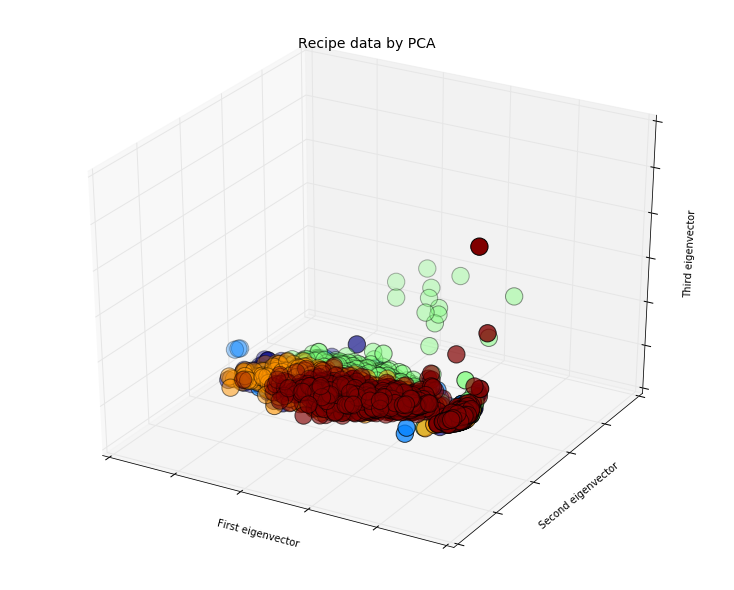

In [87]:

#SCATTERPLOT 3D
fig = plt.figure(figsize = (10, 8))
ax = Axes3D(fig)
ax.set_title('Recipe data by PCA', size=14)
ax.scatter(x_reduced[:, 0],x_reduced[:,1],x_reduced[:,2], c=course, s=300, marker='o')
ax.set_xlabel('First eigenvector')
ax.set_ylabel('Second eigenvector')
ax.set_zlabel('Third eigenvector')
ax.w_xaxis.set_ticklabels(())
ax.w_yaxis.set_ticklabels(())
ax.w_zaxis.set_ticklabels(())

# FEATURE IMPORTANCE

In [123]:
#part of dataset-ExtraTrees
array = df_data.values
x = array[:,0:10]
y = array[:,10]
#feature extraction
model = ExtraTreesClassifier()
mdl = model.fit(x,y)
print list(df_data)
print(model.feature_importances_)

model = SelectFromModel(mdl, prefit=True)
X_new = model.transform(x)
print X_new.shape

['rating', 'bitter', 'meaty', 'piquant', 'salty', 'sour', 'sweet', 'ingredientcount', 'numberofservings', 'totaltimeinseconds', 'course_num']
[ 0.03739248  0.06531923  0.06442853  0.05702267  0.05140724  0.0697864
  0.14514808  0.14602344  0.14258575  0.22088617]
(10011, 4)


ingredientcount, numberofservings, totaltimeinseconds are the top features!!

In [97]:
train = pd.read_csv('train.csv')
train = train.drop('Unnamed: 0', 1)

In [104]:
print train.shape
train.head(2)

(7508, 1824)


,rating,bitter,meaty,piquant,salty,sour,sweet,ingredientcount,numberofservings,totaltimeinseconds,...,yolks,yoplait,york,yukon,za,zest,zesty,ziti,zucchini,course_num
0,3,0.166667,0.166667,0.0,0.500000,0.833333,0.333333,11,12.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.234578,0.0,0.0,0.000000,3
1,4,0.166667,0.166667,0.0,0.166667,0.500000,0.166667,7,5.0,2100.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.337091,4


In [106]:
train = train.fillna(value=0)

In [99]:
ing = train.ix[:,11:]
ing.head(2)

,10,100,95,a1,aai,accent,acorn,active,adams,added,...,yolks,yoplait,york,yukon,za,zest,zesty,ziti,zucchini,course_num
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.234578,0.0,0.0,0.000000,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.337091,4


In [120]:
#only ing dataset-ExtraTrees
array = ing.values
x = array[:,0:1812]
y = array[:,1812]
#feature extraction
model = ExtraTreesClassifier()
mdl = model.fit(x,y)
importances = model.feature_importances_
print(importances)

model = SelectFromModel(mdl, prefit=True)
X_new = model.transform(x)
print X_new.shape

[  0.00000000e+00   1.93302863e-04   1.92113216e-05 ...,   8.74883649e-05
   6.74755543e-06   9.49830383e-04]
(7508, 297)


In [124]:
# # Print the feature ranking
# print("Feature ranking:")
# indices = np.argsort(importances)[::-1]
# for f in range(x.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


In [122]:
#whole dataset-ExtraTrees
array = train.values
x = array[:,0:1823]
y = array[:,1823]
#feature extraction
model = ExtraTreesClassifier()
mdl = model.fit(x,y)
importances = mdl.feature_importances_
print(importances)

model = SelectFromModel(mdl, prefit=True)
X_new = model.transform(x)
print X_new.shape

[ 0.00522875  0.01496802  0.01127465 ...,  0.00011553  0.          0.00100842]
(7508, 291)
